In [52]:
#get some test data and the libraries
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
%matplotlib inline

df = pd.read_csv('data/data_scientist.csv')
y_ds = df.pop('data_scientist')
x_ds = df
x_train, x_test, y_train, y_test = train_test_split(x_ds, y_ds)


###Support Vector Machines


In [3]:
df.head()

,email_hours,gym_hours,data_scientist
0,18.995746,6.879446,1
1,19.178514,5.954391,1
2,20.895603,11.638996,1
3,22.242337,10.323360,1
4,38.854161,26.899764,0


Support Vector Classifiers

- hyperplane: one less dimension than your data. 
- Margin: the smallest distance from an observtion to the hyperplane
    The overall goal is to select a margin that maximizes the distance between points and the hyperplane. This is how you optimize the function
- support vectors: define the margin
- E - tells where the error is relative to the margin and hyperplane
    E = 0, on right side
    E > 0, point on the wrong side, it has violated the margine
    E < 1 on the wrong side of the hyperplan
- C determines the severity of margins it will tolerate. 
    - C = 0, no budget for violations. a Maximal Margin Hypoerplane. 
    - choose C by cross validation.
    - small C: narrow margin, highly fit, low bias hi variance

Support Vector Machines:

- a solution for nonlinear problems.
- Use kernels to seperate the data
    - Gaussian ** (RBF - Radial Basis Function)
        - gamma is a hyper parameter that determines the spread of gaussian around each point 
    - Polynominal
        - d is a hyperparameter that determines the degree of the polynominal transformation
        - at high degrees may lead to overfitting
    - Sigmoid

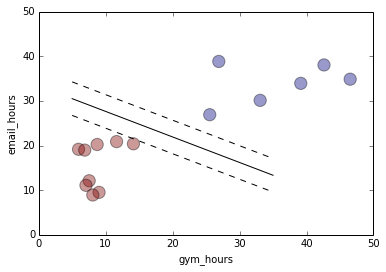

In [43]:
model = LinearSVC() #this one is faster

model = SVC(kernel='linear')
model.fit(x_train, y_train)
plot_svc_decision(model)
plt.scatter(x_train[:,1], x_train[:,0,], s=150, c = y_train, alpha = .4)
#plt.scatter(x[:, 0], x[:, 1], c = df['0.1'].map({0: 'r', 1: 'b'}), alpha = 0.4, s = 70)
plt.xlabel('gym_hours')
plt.ylabel('email_hours')
plt.ylim(0, 50)
plt.show()


###example code to fit a SVC with a kernel.
####Use grid search to determine the best parameters

Set scoring='accuracy' to set the scoring type to classification accuracy and cv=10 to set the number of folds in K-fold CV to 10.You can find the result of the grid serach in gsCV.grid_scores_ and the winner in gsCV.best_params_. Conduct a grid search over several possible values of C and d and find out what the best combination is.

So for polynominal, alter degree and C
For RBF, alter C and gamma

In [ ]:
#example
from sklearn.grid_search import GridSearchCV as GS

model_poly = SVC(kernel = 'poly')
parameters = {'C':np.linspace(0.01, 5, 20), 'degree':np.arange(10)}
gs = GS(model_poly, parameters, scoring='accuracy', cv=5, n_jobs = -1)
%time gs.fit(X, y)
print 'Poly'
print 'Best Params: {}'.format(gs.best_params_)
print 'Accuracy: {}'.format(gs.best_score_)

##More than One Class?

- One vs Rest
    - takes each classifer, and compares it to all the others as a group

- One vs One
    - compares every classifer to every other one. 

In [51]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score


In [ ]:
#EXAMPLE CODE
#X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train).predict(X_test)
print "Recall score:", recall_score(y_test, y_pred)
print "Precision score:", precision_score(y_test, y_pred)
print "Accuracy score:", accuracy_score(y_test, y_pred)

##When using SVC, you need to scale X. 
This is because uneven ranges can effect the hyerplane
####Two Methods:

#####use pipeline to scale x data

Scale x1 and x2 using the StandardScaler. Use Pipeline to specify the step following the StandardScaler, which would be fitting the scaled features to a linear kernel SVC to predict y. Pipeline is a good practice to keep track of the transformations leading up to fitting the predictive model. Below is a snippet demonstrating the use of Pipeline.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel='linear'))])
pipeline.fit(x_ds, y_ds)
pipeline.steps[1][1].coef_
pipeline.named_steps['svc'].coef_

array([[-0.75948274, -0.90854631]])

#####use scale

In [6]:
from sklearn.preprocessing import StandardScaler, scale

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

##Example Plot Functions

In [28]:
def plot_svc_decision(svc, show=False):
    # get the separating hyperplane
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(5, 35)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    if show:
        plt.show()

####visualize non-linear decision boundary!

In [47]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

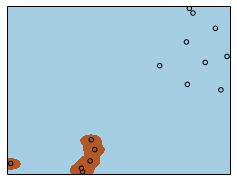

In [53]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
decision_boundary(model, x_train, y_train)
